# Time Series Visualization

#### Impprting Packages

In [51]:
import statsmodels.api as sm 
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt 
from pylab import rcParams 

rcParams['figure.figsize'] = 11, 9

#### Load Time-Series Data

In [61]:
#statsmodels comes with built-in-dataset,so we can load a time-series dataset straight into memory

data = sm.datasets.co2.load_pandas()
co2 = data.data
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [53]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [54]:
#weekly data can be tricky to work with,so lets use the monthly averages of our time-series 

y = co2['co2'].resample('MS').mean()

#here the term MS means that we group the data in buckets by months and ensures that we are using the start of each month as the timestamp

y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [55]:
#Retreive data after year 1990
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-09-01

In [56]:
#Retreive data point between October 1995 and October 1996
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

#### Handling Missing values in Time-Series Data

In [58]:
print("Missing values:",y.isnull().sum())

y[y.isnull()]

Missing values: 5


1958-06-01   NaN
1958-10-01   NaN
1964-02-01   NaN
1964-03-01   NaN
1964-04-01   NaN
Name: co2, dtype: float64

In [47]:
#the output tell us there are 5 months with missing values in our time series

y = y.fillna(y.bfill())

In [48]:
#check again if there is any missing value

y.isnull().sum()

0

#### Visualizing Time Series Data

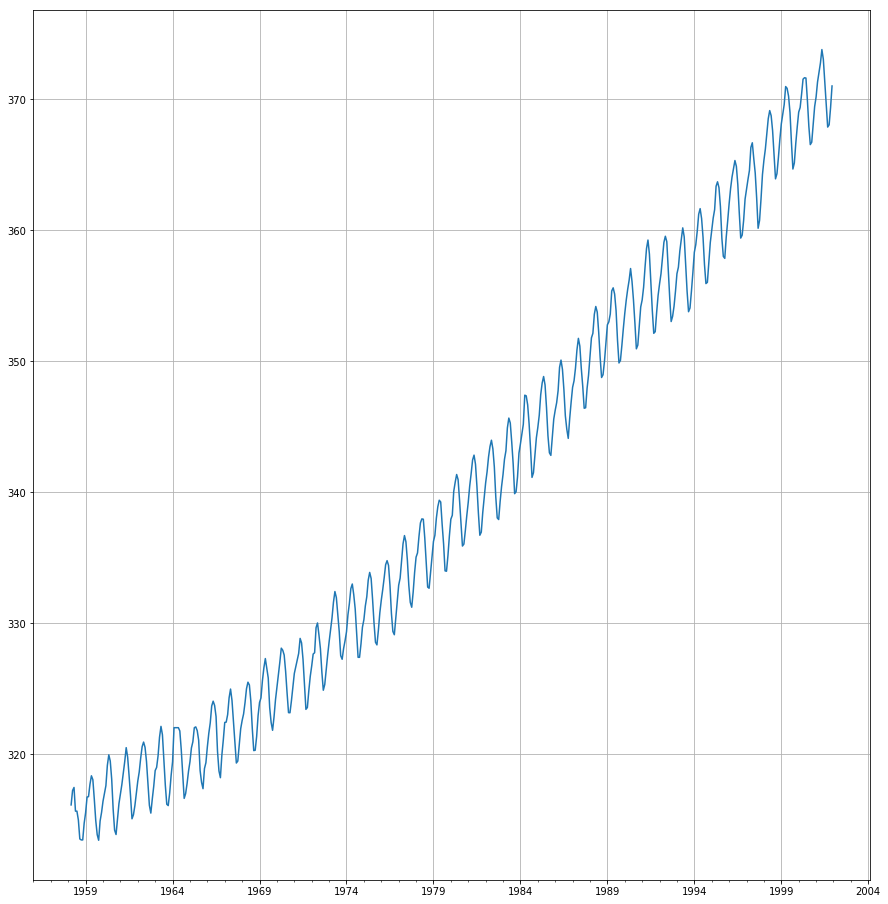

In [49]:
y.plot(figsize=(15,16))
plt.grid()
plt.show()

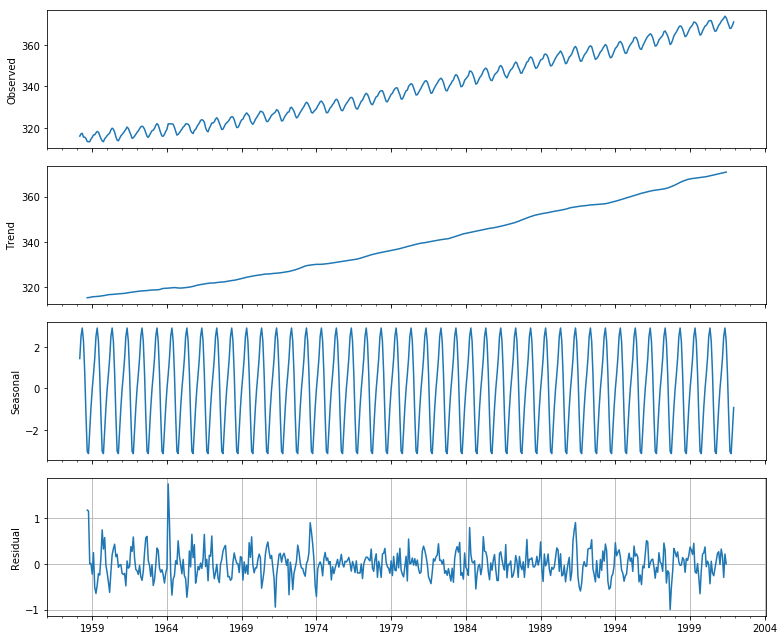

In [38]:
#Perform time-series seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(y, model='Addictive')
fig = decomposition.plot()
plt.grid()
plt.show()